#### Import Necessary Libraries

In [1]:
import pandas as pd

### Task #1: Merge The 12 months of sales data into a single CSV file

In [9]:
# Checking how the data looks
df = pd.read_csv('Sales_Data\Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [31]:
# Merging all datafiles into a single variable
from os import listdir, mkdir
from os.path import isfile, join, exists
files = [f for f in listdir('Sales_Data') if isfile(join('Sales_Data', f))]

sales_df = pd.DataFrame()

for files in files:
    df = pd.read_csv('Sales_Data\\' + files)
    sales_df = pd.concat([sales_df, df])

mkdir('Output') if not exists('Output') else None
sales_df.to_csv('Output\\all_sales_data.csv', index=False)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Read in updated DataFrame

In [50]:
sales_df = pd.read_csv('Output\\all_sales_data.csv')
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data

##### Drop rows of NAN

In [51]:
# Checking where we have nan
nan_df = sales_df[sales_df.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Dropping nan rows
sales_df = sales_df.dropna(how='all') #'all' : If all values are NA, drop that row or column.

##### Find 'Or' and delete it

In [53]:
# Checking where we have 'Or' in Order Date column
tmp_df = sales_df[sales_df['Order Date'].str[0:2] == 'Or']
tmp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [54]:
# Dropping rows where we have 'Or' into Order date column
sales_df = sales_df[sales_df['Order Date'].str[0:2] != 'Or']
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Convert columns to the correct type

In [59]:
sales_df['Price Each'] = pd.to_numeric(sales_df['Price Each'])
sales_df['Quantity Ordered'] = pd.to_numeric(sales_df['Quantity Ordered'])

sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Augment data with some additional columns

### Task 2: Add month Column

In [55]:
sales_df['Month'] = sales_df['Order Date'].str[0:2]
sales_df['Month'] = sales_df['Month'].astype('int32')
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task 3: Add a sales column

In [62]:
sales_df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales'],
      dtype='object')

In [63]:
sales_df['Sales'] = sales_df['Quantity Ordered'] * sales_df['Price Each']
sales_df = sales_df[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Order Date', 'Purchase Address', 'Month']]
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 4: Add a City collumn

In [166]:
# Let's use .apply(). It's apply a function along an axis of the DataFrame.
sales_df['City'] = sales_df['Purchase Address'].apply(lambda x: f"{x.split(',')[1].lstrip()} ({x.split(',')[2].split(' ')[1]})")
sales_df = sales_df[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Order Date','Month', 'Purchase Address', 'City']]

sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001",Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215",Boston (MA)
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


#### Question 1: What was the best month for sales? How much was earned that month?

In [76]:
best_month = sales_df.groupby('Month').sum()
best_month.sort_values(by='Sales', ascending=False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4.588415e+06,4.613443e+06
10,22703,3.715555e+06,3.736727e+06
4,20558,3.367671e+06,3.390670e+06
11,19798,3.180601e+06,3.199603e+06
5,18667,3.135125e+06,3.152607e+06
3,17005,2.791208e+06,2.807100e+06
7,16072,2.632540e+06,2.647776e+06
6,15253,2.562026e+06,2.577802e+06
8,13448,2.230345e+06,2.244468e+06


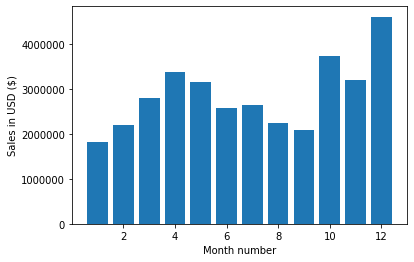

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

months = range(1, 13)
plt.bar(months, best_month['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

### Question 2: What city had the highest number of sales?

In [169]:
best_selling_city = sales_df.groupby('City').sum()
best_selling_city.sort_values(by='Quantity Ordered', ascending=False)

,Quantity Ordered,Price Each,Sales,Month
City,,,,
San Francisco (CA),50239,8.211462e+06,8.262204e+06,315520
Los Angeles (CA),33289,5.421435e+06,5.452571e+06,208325
New York City (NY),27932,4.635371e+06,4.664317e+06,175741
Boston (MA),22528,3.637410e+06,3.661642e+06,141112
Dallas (TX),16730,2.752628e+06,2.767975e+06,104620
Atlanta (GA),16602,2.779908e+06,2.795499e+06,104794
Seattle (WA),16553,2.733296e+06,2.747755e+06,104941
Portland (OR),11303,1.860558e+06,1.870732e+06,70621
Austin (TX),11153,1.809874e+06,1.819582e+06,69829


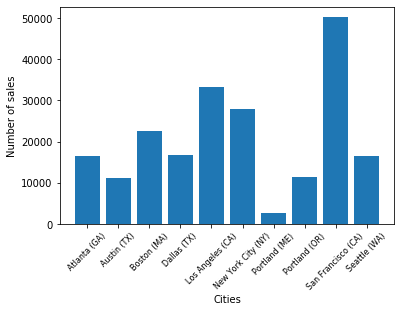

In [175]:
cities = best_selling_city.index
plt.bar(cities, best_selling_city['Quantity Ordered'])
plt.xticks(cities, rotation=45, size=8)
plt.ylabel('Number of sales')
plt.xlabel('Cities')
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [180]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001",Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,4,"682 Chestnut St, Boston, MA 02215",Boston (MA)
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,4,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


In [182]:
sales_df['Hour'] = sales_df['Order Date'].dt.hour
sales_df['Minute'] = sales_df['Order Date'].dt.minute
hours = [hour for hour, df in sales_df.groupby('Hour')]

In [221]:
peaks = sales_df.groupby('Hour').count()['Product'].sort_values( ascending=False)[:2]
y_peak = peaks.values
x_peak = peaks.index

In [222]:
peaks.values

array([12905, 12587], dtype=int64)

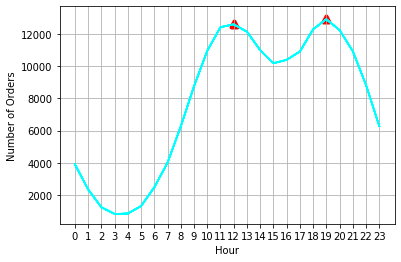

Above we can see that we have 2 peaks of orders, on 12pm and 19pm. So my recommendation is around 11 am and/or 18am.


In [238]:
plt.plot(hours, sales_df.groupby('Hour').count(), color='cyan')
plt.scatter(x_peak,y_peak, linewidths= 4, marker='^', facecolor='red')
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

print('Above we can see that we have 2 peaks of orders, on 12pm and 19pm. So my recommendation is around 11 am and/or 18am.')

### Question 4: What products are most sold together?

In [246]:
# Creating a new collumn 'Grouped' with the products thas was sold together
df = sales_df[sales_df['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

# Removing duplicates
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\jorge\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [254]:
from itertools import combinations
from collections import Counter

# Verifying all possible pairs combinations and counting them 
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product sold the most? Why do you think it sold the most?

In [292]:
df_pg = sales_df.groupby('Product')
quantity_ordered = df_pg.sum()['Quantity Ordered']

quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

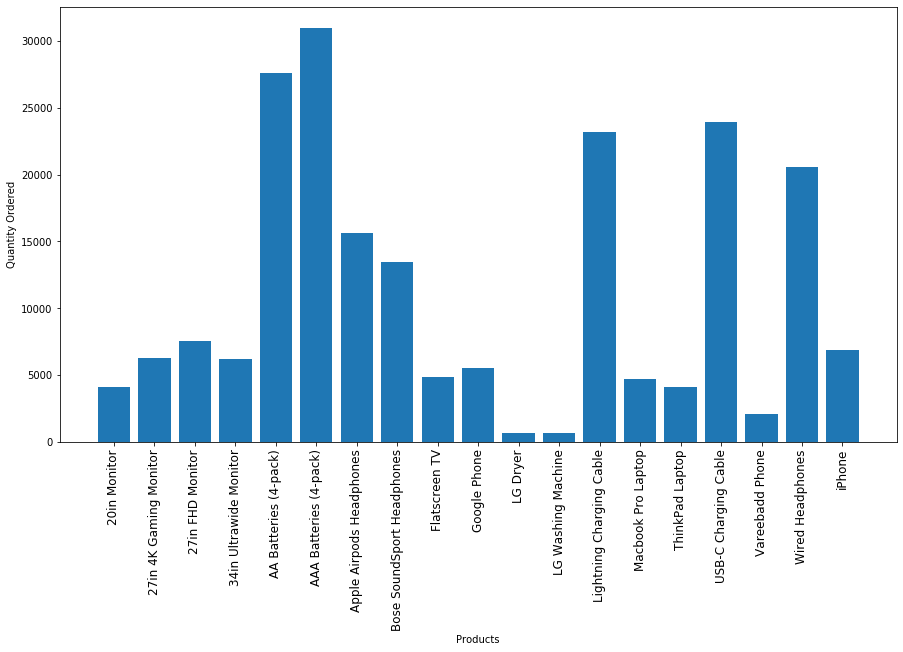

In [293]:
products = [product for product, df in df_pg]
plt.figure(figsize=(15, 8))
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation=90, size=12)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.show()

In [294]:
prices = sales_df.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


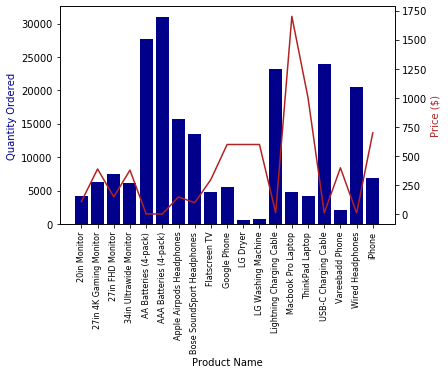

In [332]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='darkblue')
ax2.plot(products, prices, color ='firebrick')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='darkblue')
ax2.set_ylabel('Price ($)', color='firebrick')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

In [ ]:
print()